In [1]:
import os
import cv2
import numpy as np
import pandas as pd
from skimage import io, img_as_float
from skimage.filters import sobel
from scipy.stats import skew, kurtosis, entropy
from tqdm import tqdm

In [ ]:
def load_gray(img_path, size=(512, 512)):
    """Load image as grayscale and resize."""
    img = io.imread(img_path, as_gray=True)
    img = img_as_float(img)
    return cv2.resize(img, size, interpolation=cv2.INTER_AREA)


In [3]:
def extract_features(img, file_path, scanner_id="unknown"):
    """Extract statistical and structural image features."""
    h, w = img.shape
    aspect_ratio = w / h
    pixel_count = h * w
    file_size_kb = os.path.getsize(file_path) / 1024

    pixels = img.flatten()
    mean_intensity = np.mean(pixels)
    std_intensity = np.std(pixels)
    skewness = skew(pixels)
    kurt = kurtosis(pixels)
    ent = entropy(np.histogram(pixels, bins=256, range=(0, 1))[0] + 1e-6)

    edges = sobel(img)
    edge_density = np.mean(edges > 0.1)

    # Derive resolution and class name from folder/file name
    file_name = os.path.basename(file_path)
    resolution = "unknown"
    if "_" in file_name:
        parts = file_name.split("_")
        if len(parts) > 1 and parts[1].isdigit():
            resolution = parts[1]

    return {
        "Image_name": file_name,
        "resolution": resolution,
        "class": scanner_id,
        "width": w,
        "height": h,
        "aspect_ratio": aspect_ratio,
        "file_size_kb": file_size_kb,
        "pixel_count": pixel_count,
        "mean_intensity": mean_intensity,
        "std_intensity": std_intensity,
        "skewness": skewness,
        "kurtosis": kurt,
        "entropy": ent,
        "edge_density": edge_density
    }

In [ ]:
import os
import cv2
import numpy as np
import pandas as pd
from scipy.stats import skew, kurtosis
from skimage.filters import sobel
from skimage import io
from skimage.util import img_as_float
from skimage.exposure import histogram
from skimage.measure import shannon_entropy

# Base path where .tif images are stored
base_path = r"D:\Infosys_AI-Tracefinder\Data\Official\Canon120-2\300"

# List all .tif files
image_files = [f for f in os.listdir(base_path) if f.lower().endswith('.tif')]
print("🖼️ Image files found:", len(image_files))

data = []

for img_name in image_files:
    img_path = os.path.join(base_path, img_name)
    print("Processing:", img_path)
    
    try:
        # Read image in grayscale
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        if img is None:
            print(f"⚠️ Could not read {img_name}")
            continue

        # Convert to float for analysis
        img_float = img_as_float(img)

        # Basic properties
        height, width = img.shape
        aspect_ratio = width / height
        file_size_kb = os.path.getsize(img_path) / 1024

        # Intensity statistics
        mean_intensity = float(np.mean(img_float))
        std_intensity = float(np.std(img_float))
        skewness = float(skew(img_float.flatten()))
        kurt = float(kurtosis(img_float.flatten()))
        entropy_val = float(shannon_entropy(img_float))

        # Edge density using Sobel
        edges = sobel(img_float)
        edge_density = float(np.sum(edges > 0) / edges.size)

        # Class label example (from folder name or pattern)
        class_label = "Canon120-2"

        # Append record
        features = {
            "file_name": img_name,
            "class_label": class_label,
            "width": width,
            "height": height,
            "aspect_ratio": aspect_ratio,
            "file_size_kb": file_size_kb,
            "mean_intensity": mean_intensity,
            "std_intensity": std_intensity,
            "skewness": skewness,
            "kurtosis": kurt,
            "entropy": entropy_val,
            "edge_density": edge_density
        }
        data.append(features)
    
    except Exception as e:
        print(f"⚠️ Error processing {img_name}: {e}")

# Convert to DataFrame
df = pd.DataFrame(data)

# Save CSV
output_path = r"D:\Infosys_AI-Tracefinder\Output\Output.csv"
df.to_csv(output_path, index=False)
print("✅ Feature extraction complete. Saved to:", output_path)

# Display in tabular format
display(df.head(10))


🖼️ Image files found: 20
Processing: D:\Infosys_AI-Tracefinder\Data\Official\Canon120-2\300\s2_100.tif
Processing: D:\Infosys_AI-Tracefinder\Data\Official\Canon120-2\300\s2_80.tif
Processing: D:\Infosys_AI-Tracefinder\Data\Official\Canon120-2\300\s2_81.tif
Processing: D:\Infosys_AI-Tracefinder\Data\Official\Canon120-2\300\s2_83.tif
Processing: D:\Infosys_AI-Tracefinder\Data\Official\Canon120-2\300\s2_84.tif
Processing: D:\Infosys_AI-Tracefinder\Data\Official\Canon120-2\300\s2_85.tif
Processing: D:\Infosys_AI-Tracefinder\Data\Official\Canon120-2\300\s2_86.tif
Processing: D:\Infosys_AI-Tracefinder\Data\Official\Canon120-2\300\s2_87.tif
Processing: D:\Infosys_AI-Tracefinder\Data\Official\Canon120-2\300\s2_88.tif
Processing: D:\Infosys_AI-Tracefinder\Data\Official\Canon120-2\300\s2_89.tif
Processing: D:\Infosys_AI-Tracefinder\Data\Official\Canon120-2\300\s2_90.tif
Processing: D:\Infosys_AI-Tracefinder\Data\Official\Canon120-2\300\s2_91.tif
Processing: D:\Infosys_AI-Tracefinder\Data\Officia

,file_name,class_label,width,height,aspect_ratio,file_size_kb,mean_intensity,std_intensity,skewness,kurtosis,entropy,edge_density
0,s2_100.tif,Canon120-2,2480,3508,0.706956,25495.067383,0.984671,0.096211,-6.917807,47.986926,0.898373,0.379310
1,s2_80.tif,Canon120-2,2480,3508,0.706956,25495.067383,0.981380,0.103502,-6.244415,38.710836,1.153005,0.384637
2,s2_81.tif,Canon120-2,2480,3508,0.706956,25495.067383,0.973063,0.124517,-5.002929,24.220606,1.271087,0.426189
3,s2_83.tif,Canon120-2,2480,3508,0.706956,25495.067383,0.977385,0.115707,-5.549806,30.042091,1.169412,0.432452
4,s2_84.tif,Canon120-2,2480,3508,0.706956,25495.067383,0.988492,0.074653,-8.581724,77.094436,1.240496,0.485158
5,s2_85.tif,Canon120-2,2480,3508,0.706956,25495.067383,0.979784,0.110967,-6.095951,36.997855,1.081899,0.427182
6,s2_86.tif,Canon120-2,2480,3508,0.706956,25495.067383,0.980078,0.107046,-5.684656,31.387638,0.980473,0.355376
7,s2_87.tif,Canon120-2,2480,3508,0.706956,25495.067383,0.981322,0.105320,-6.140414,37.061296,1.076589,0.444122
8,s2_88.tif,Canon120-2,2480,3508,0.706956,25495.067383,0.980284,0.099749,-5.890978,35.801179,1.306555,0.540682
9,s2_89.tif,Canon120-2,2480,3508,0.706956,25495.067383,0.972177,0.125012,-4.918924,23.522813,1.298268,0.384347


✅ Image loaded successfully.


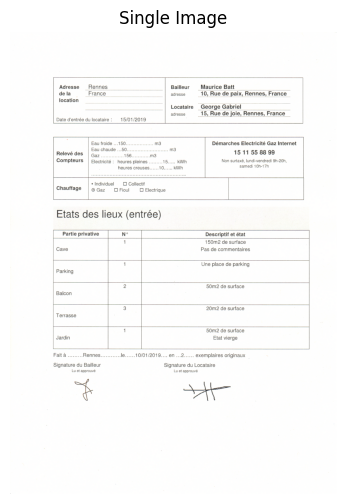

In [11]:
import cv2
import matplotlib.pyplot as plt

# Path to your single image
img_path = r"D:\Infosys_AI-Tracefinder\Data\Official\Canon120-2\300\s2_80.tif"

# Check if the file exists
import os
if not os.path.exists(img_path):
    print("❌ File not found:", img_path)
else:
    # Read the image
    img = cv2.imread(img_path)
    if img is None:
        print("❌ Could not read image.")
    else:
        print("✅ Image loaded successfully.")

        # Display the image
        plt.figure(figsize=(6,6))
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.title("Single Image")
        plt.axis('off')
        plt.show()


In [17]:
import os
import cv2
import matplotlib.pyplot as plt
from skimage.filters import sobel
from skimage import img_as_float

def process_single_image(input_path, output_path, apply_edge=True, show_original=True):
    """
    Processes a single image and optionally applies edge detection.
    """
    # Check if input file exists
    if not os.path.exists(input_path):
        print("❌ File not found:", input_path)
        return
    
    # Load image
    img = cv2.imread(input_path)
    if img is None:
        print("❌ Could not read image.")
        return
    print("✅ Image loaded successfully.")
    
    # Display original image
    if show_original:
        plt.figure(figsize=(6,6))
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.title("Original Image")
        plt.axis('off')
        plt.show(block=True)
    
    processed_img = img
    
    # Apply edge detection
    if apply_edge:
        img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        img_float = img_as_float(img_gray)
        edges = sobel(img_float)
        processed_img = (edges * 255).astype('uint8')
        
        plt.figure(figsize=(6,6))
        plt.imshow(processed_img, cmap='gray')
        plt.title("Edge Detection")
        plt.axis('off')
        plt.show(block=True)
    
    # Save processed image
    cv2.imwrite(output_path, processed_img)
    print("✅ Processed image saved at:", output_path)


✅ Image loaded successfully.


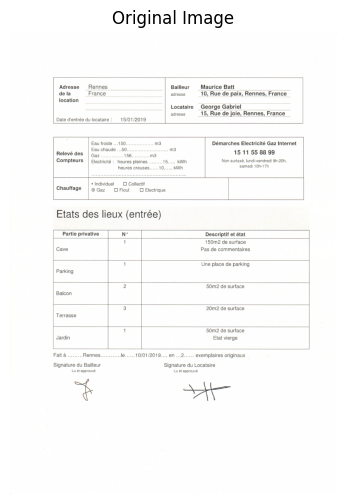

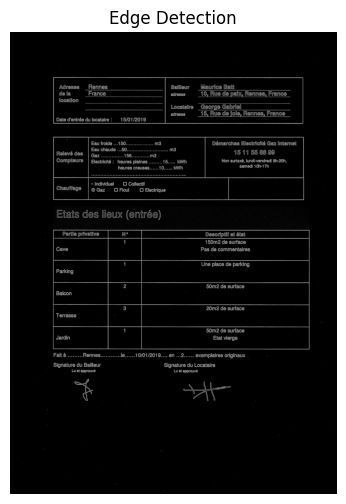

✅ Processed image saved at: D:\Infosys_AI-Tracefinder\Output\s2_80_processed.png


In [18]:
input_path = r"D:\Infosys_AI-Tracefinder\Data\Official\Canon120-2\300\s2_80.tif"
output_path = r"D:\Infosys_AI-Tracefinder\Output\s2_80_processed.png"

process_single_image(input_path, output_path)


In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis
from skimage.filters import sobel
from skimage import img_as_float
from skimage.measure import shannon_entropy

def process_single_image(input_path, output_path, apply_edge=True, show_original=True):
    """
    Processes a single image, optionally applies edge detection,
    and prints detailed feature statistics.
    """
    
    # --- Step 1: Check file existence ---
    if not os.path.exists(input_path):
        print("❌ File not found:", input_path)
        return
    
    # --- Step 2: Load image ---
    img = cv2.imread(input_path)
    if img is None:
        print("❌ Could not read image.")
        return
    print("✅ Image loaded successfully.\n")
    
    # --- Step 3: Display original image ---
    if show_original:
        plt.figure(figsize=(6,6))
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.title("Original Image")
        plt.axis('off')
        plt.show(block=True)
    
    # --- Step 4: Convert to grayscale and float for processing ---
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img_float = img_as_float(img_gray)
    
    # --- Step 5: Compute image statistics ---
    height, width = img_gray.shape
    aspect_ratio = width / height
    file_size_kb = os.path.getsize(input_path) / 1024
    mean_intensity = float(np.mean(img_float))
    std_intensity = float(np.std(img_float))
    skewness = float(skew(img_float.flatten()))
    kurt = float(kurtosis(img_float.flatten()))
    entropy_val = float(shannon_entropy(img_float))
    
    # --- Step 6: Edge detection & density ---
    edges = sobel(img_float)
    edge_density = float(np.sum(edges > 0) / edges.size)
    
    # --- Step 7: Display edge-detected image ---
    if apply_edge:
        processed_img = (edges * 255).astype('uint8')
        plt.figure(figsize=(6,6))
        plt.imshow(processed_img, cmap='gray')
        plt.title("Edge Detection")
        plt.axis('off')
        plt.show(block=True)
    else:
        processed_img = img
    
    # --- Step 8: Save processed image ---
    cv2.imwrite(output_path, processed_img)
    print("✅ Processed image saved at:", output_path)
    
    # --- Step 9: Display tabular-style stats ---
    print("\n📊 Image Feature Summary:")
    print("-" * 80)
    print(f"{'Feature':25s} | {'Value'}")
    print("-" * 80)
    print(f"{'File Name':25s} | {os.path.basename(input_path)}")
    print(f"{'Width x Height':25s} | {width} x {height}")
    print(f"{'Aspect Ratio':25s} | {aspect_ratio:.3f}")
    print(f"{'File Size (KB)':25s} | {file_size_kb:.2f}")
    print(f"{'Mean Intensity':25s} | {mean_intensity:.6f}")
    print(f"{'Std Intensity':25s} | {std_intensity:.6f}")
    print(f"{'Skewness':25s} | {skewness:.6f}")
    print(f"{'Kurtosis':25s} | {kurt:.6f}")
    print(f"{'Entropy':25s} | {entropy_val:.6f}")
    print(f"{'Edge Density':25s} | {edge_density:.6f}")
    print("-" * 80)
    
    # --- Step 10: Return dictionary (optional) ---
    return {
        "file_name": os.path.basename(input_path),
        "width": width,
        "height": height,
        "aspect_ratio": aspect_ratio,
        "file_size_kb": file_size_kb,
        "mean_intensity": mean_intensity,
        "std_intensity": std_intensity,
        "skewness": skewness,
        "kurtosis": kurt,
        "entropy": entropy_val,
        "edge_density": edge_density
    }


✅ Image loaded successfully.



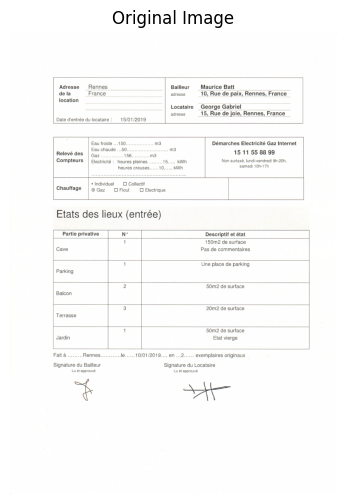

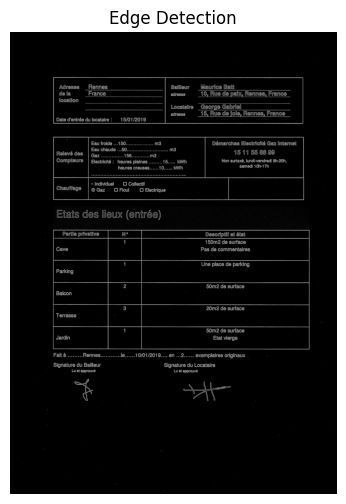

✅ Processed image saved at: D:\Infosys_AI-Tracefinder\Output\s2_80_processed.png

📊 Image Feature Summary:
--------------------------------------------------------------------------------
Feature                   | Value
--------------------------------------------------------------------------------
File Name                 | s2_80.tif
Width x Height            | 2480 x 3508
Aspect Ratio              | 0.707
File Size (KB)            | 25495.07
Mean Intensity            | 0.981380
Std Intensity             | 0.103502
Skewness                  | -6.244420
Kurtosis                  | 38.710874
Entropy                   | 1.153001
Edge Density              | 0.384637
--------------------------------------------------------------------------------


In [2]:
input_path = r"D:\Infosys_AI-Tracefinder\Data\Official\Canon120-2\300\s2_80.tif"
output_path = r"D:\Infosys_AI-Tracefinder\Output\s2_80_processed.png"

features = process_single_image(input_path, output_path)